In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from weight_diffusion.evaluation.util import load_logging_dict

In [75]:
logging_dict = load_logging_dict("../logs.json")
PA_KEY = "prompt_alignment"
TARGETS_KEY = "targets"
TEST_ACC_KEY = "test_acc"
ROLL_TRAIN_KEY = "train_running_accuracy"
ROLL_TRAIN_LOSS = "train_running_loss"

In [76]:
def get_test_acc_from_prompt(prompt:str)->str:
    # TODO replace with regex
    return "Test Accuracy: " + prompt[-8:-2]

In [77]:
def plot_prompt_alignment(logging_dict):
    prompt_alignments = [
        (v[PA_KEY], v[TARGETS_KEY][TEST_ACC_KEY])
        for _, v in logging_dict.items()
    ]
    ax = sns.barplot(
        data=prompt_alignments,
    )
    ax.set_xticklabels([x[1] for x in prompt_alignments])
    ax.set_ylabel("Prompt Alignment (RMSE)")
    ax.set_xlabel("Prompted Test accuracy")
    ax.set_title("Prompt alignment across different prompts")

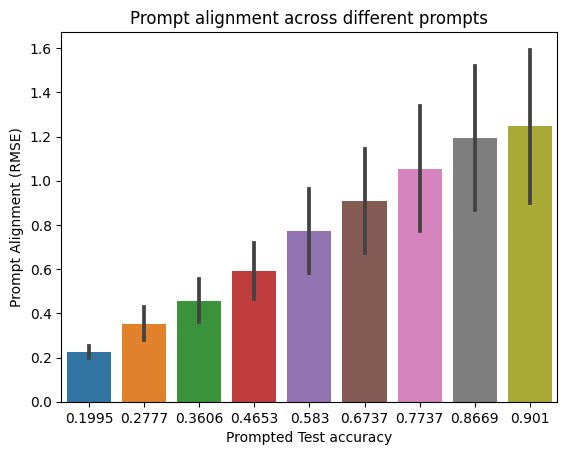

In [78]:
plot_prompt_alignment(logging_dict=logging_dict)

In [79]:
def plot_desired_vs_observed(logging_dict, metric_key:str = "test_acc", epoch:int = 0):
    desired = [
        v[TARGETS_KEY][metric_key]
        for k,v in logging_dict.items()
    ]
    observed =[
        v[f"epoch_{epoch}"][metric_key]
        for _, v in logging_dict.items()
    ]
    ax = sns.lineplot(
        x=desired,
        y=observed,
    )
    ax.set_title(f"Desired vs. Observed {metric_key}")
    ax.set_xlabel(f"Desired {metric_key}")
    ax.set_ylabel(f"Observed {metric_key}")

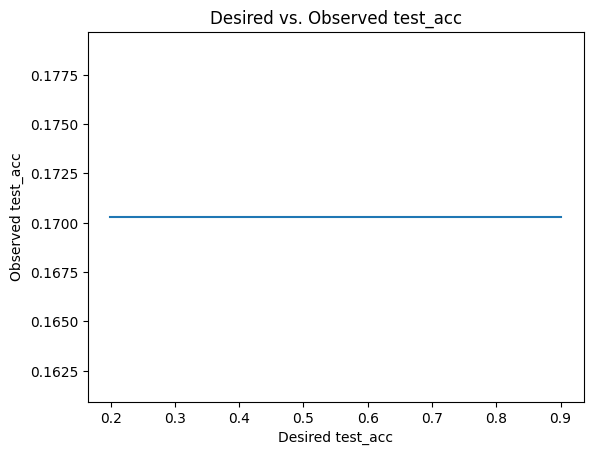

In [80]:
plot_desired_vs_observed(logging_dict=logging_dict)

In [97]:
import numpy as np

np.sum(np.abs(np.array(a) - (np.array(b))))

0.0